In [318]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [319]:
#loading boston house price datasets

from sklearn.datasets import load_boston
boston = load_boston()

In [320]:
#Looking the shapr of the data
print(boston.data.shape)

(506, 13)


In [321]:
#Printing the features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [322]:
#looking the describtion and Attribute Information
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [323]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [324]:
#converting into pandas and printing the head
import pandas as pd
bos = pd.DataFrame(data=boston.data)
bos.head(5)
 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [325]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [326]:
bos.shape

(506, 13)

In [327]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [328]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split


price=boston.target
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(bos, price, test_size = 0.33, random_state = 5)


print('Train shape', X_train.shape)
print('Test shape', X_test.shape)
print('Train shape', Y_train.shape)
print('Test shape', Y_test.shape)

Train shape (339, 13)
Test shape (167, 13)
Train shape (339,)
Test shape (167,)


In [329]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
X_train=s.fit_transform(np.array(X_train))
X_test=s.transform(np.array(X_test))

In [330]:
# SGD regressor manual training data
man_train=pd.DataFrame(data=X_train)
man_train['price']=Y_train

In [331]:
#converting to numpy array
X_test = np.array(X_test)
Y_test=np.array(Y_test)

In [332]:
res=pd.DataFrame(columns=['sno', 'algo', 'alpha', 'lr_rate_variation', 'init_lr_rate', 'power_t', 'n_iter', 'error'])




In [333]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.regplot(Y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted")
    plt.grid(True)
    plt.show()
    

    sgd_error=mean_squared_error(Y_test,y_pred)
    print('mean sqr error=', sgd_error)
    print('number of iterations =', n_iter)
    print("\n ---Slope--- \n",clf.coef_)
    print("\n---Intercept--- \n",clf.intercept_)
    return clf.coef_, clf.intercept_, sgd_error


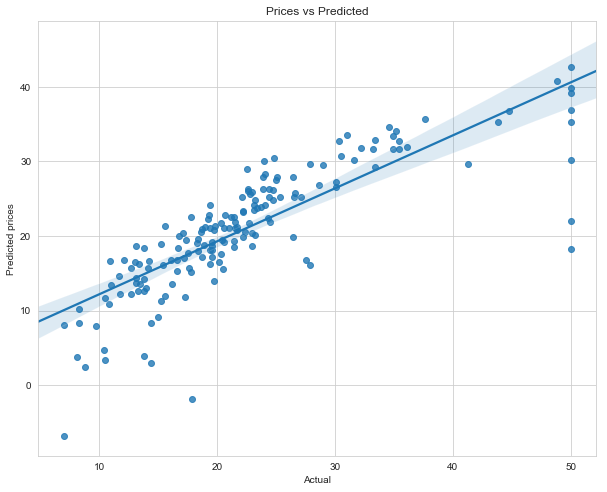

mean sqr error= 32.68992458405756
number of iterations = 1

 ---Slope--- 
 [-1.15451538  0.62739545 -1.05270589  0.51272564 -0.00704808  3.28681963
 -0.83093975 -1.65508507  0.83708974 -0.42540257 -1.59714823  0.79687425
 -3.0168991 ]

---Intercept--- 
 [21.62476992]


In [334]:
# SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)



In [335]:
new=[1, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1, error_sgd]
res.loc[0]=new

In [336]:
# Manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

def manual_fixed(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new


def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.regplot(Y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted")
    plt.grid(True)
    plt.show()
      
       
    manual_error=mean_squared_error(Y_test,y_pred)
    print('error=',manual_error)
    
    return manual_error

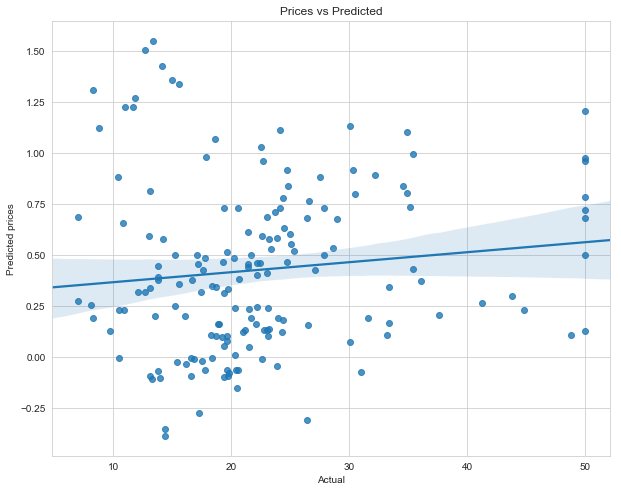

error= 581.1547866807905


In [337]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=1)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [338]:
new=[2, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1, manual_error]
res.loc[1]=new

In [339]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-1.15451538  0.62739545 -1.05270589  0.51272564 -0.00704808  3.28681963
 -0.83093975 -1.65508507  0.83708974 -0.42540257 -1.59714823  0.79687425
 -3.0168991 ]
*********************************************************************************
sgd weight---
 [[-0.02786544  0.09247879  0.07209797  0.09815829  0.00602633  0.03424121
  -0.13781974  0.12929866  0.09491071  0.145088   -0.00473804 -0.25241295
  -0.10620876]]


In [340]:
b_diff=[]
w_num=[]

percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('Number of points more than 30% =',cnt)
print('Sgd Intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

Number of points more than 30% = 13
Sgd Intercept= [21.62476992]
Manual Intercept= [0.4058]


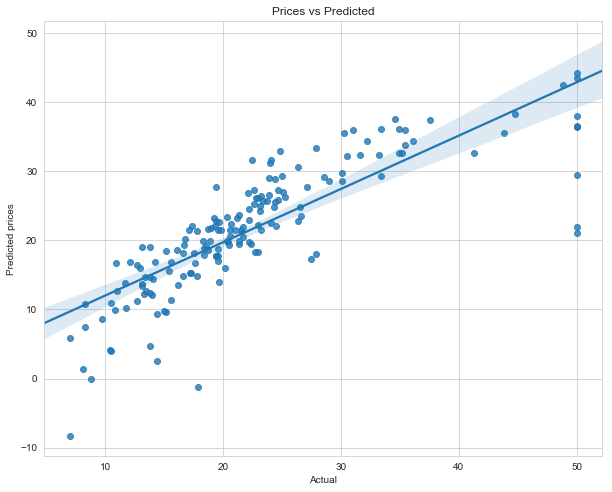

mean sqr error= 32.555806480087476
number of iterations = 100

 ---Slope--- 
 [-1.42773685  1.33529848 -0.2202258  -0.16685147 -1.52507545  2.68300024
 -0.44231497 -2.69670534  2.90741932 -2.35707221 -2.45485885  1.01610677
 -3.56659361]

---Intercept--- 
 [22.42432868]


In [341]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

In [342]:
new=[3, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 100, error_sgd]
res.loc[2]=new

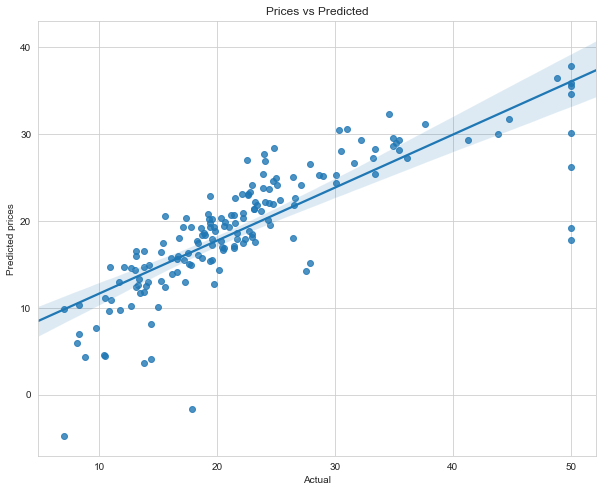

error= 42.38091998722532


In [343]:
w, b = manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
 

In [344]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-1.42773685  1.33529848 -0.2202258  -0.16685147 -1.52507545  2.68300024
 -0.44231497 -2.69670534  2.90741932 -2.35707221 -2.45485885  1.01610677
 -3.56659361]
*********************************************************************************
sgd weight---
 [[-0.6645535   0.80959274 -0.04504701  0.26514546  0.06043692  2.39162425
  -0.25013284 -1.15544769  0.0888184  -0.38187036 -1.97505101  0.87652696
  -3.09308562]]


In [345]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

number of points more than 30% in percent= 9
Sgd intercept= [22.42432868]
Manual Intercept= [19.638906]


In [346]:
new=[4, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 100, manual_error]
res.loc[3]=new

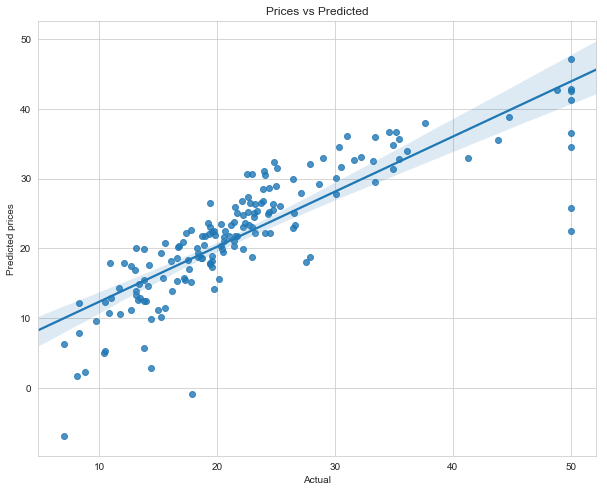

mean sqr error= 27.950880163842545
number of iterations = 1000

 ---Slope--- 
 [-1.15487752  0.99163057 -0.21313446  0.84068331 -1.52606576  2.78784029
 -0.18089243 -2.48709914  2.97349628 -2.23978358 -2.45049694  1.20003159
 -3.512988  ]

---Intercept--- 
 [22.87429928]


In [347]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [348]:
new=[5, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1000, error_sgd]
res.loc[4]=new

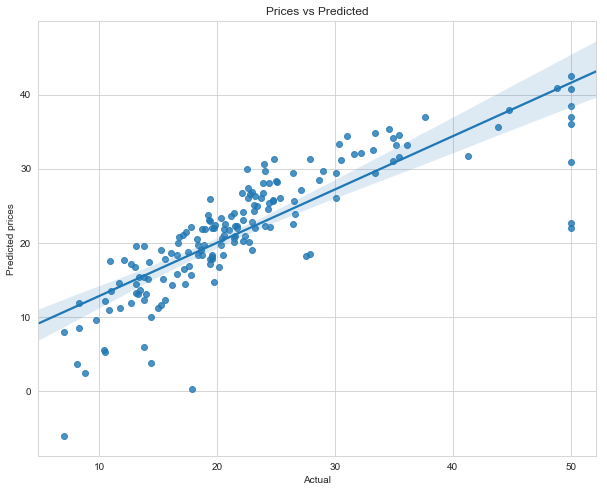

error= 29.46133205930645


In [349]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [350]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-1.15487752  0.99163057 -0.21313446  0.84068331 -1.52606576  2.78784029
 -0.18089243 -2.48709914  2.97349628 -2.23978358 -2.45049694  1.20003159
 -3.512988  ]
*********************************************************************************
sgd weight---
 [[-1.21621368  0.73412432 -0.55344236  0.17098119 -1.54020225  2.6945703
  -0.40897904 -2.52355861  2.1788653  -1.40340508 -2.06784118  1.00089669
  -3.33184554]]


In [351]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

number of points more than 30% in percent= 6
Sgd intercept= [22.87429928]
Manual Intercept= [22.48522577]


In [352]:
new=[6, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1000, manual_error]
res.loc[5]=new

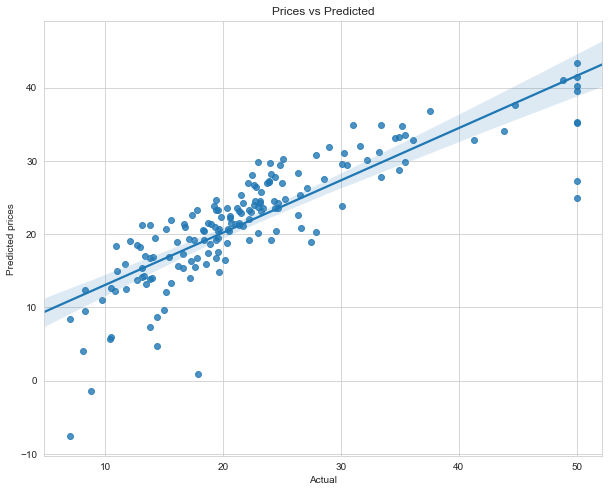

mean sqr error= 27.774536940739637
number of iterations = 10000

 ---Slope--- 
 [-1.93182433  0.97979841 -0.02380664  0.74163114 -1.18420346  2.44846007
 -0.19126889 -3.12289334  3.19893846 -2.13116739 -2.04915382  0.9676209
 -3.59916334]

---Intercept--- 
 [22.61401268]


In [353]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)


In [354]:
new=[7, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd]
res.loc[6]=new

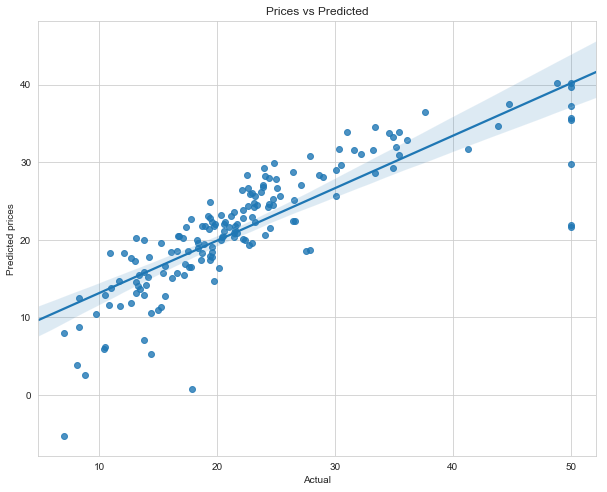

error= 30.108587396756242


In [355]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [356]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('Manual sgd weight---\n',w)

sgd weight---
 [-1.93182433  0.97979841 -0.02380664  0.74163114 -1.18420346  2.44846007
 -0.19126889 -3.12289334  3.19893846 -2.13116739 -2.04915382  0.9676209
 -3.59916334]
*********************************************************************************
Manual sgd weight---
 [[-1.20983179  0.77161114  0.04899571 -0.11532283 -1.48136329  2.72921695
  -0.36759896 -2.53894548  2.74128198 -2.26884669 -1.93344156  1.13244462
  -3.06953316]]


In [357]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('Number of points more than 30%',cnt)
print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

Number of points more than 30% 4
Sgd intercept= [22.61401268]
Manual Intercept= [22.29312088]


In [358]:
res

,sno,algo,alpha,lr_rate_variation,init_lr_rate,power_t,n_iter,error
0,1,SGDRegressor,0.0001,constant,0.01,0.25,1,32.689925
1,2,manual sgd,0.0001,constant,0.01,0.25,1,581.154787
2,3,SGDRegressor,0.0001,constant,0.01,0.25,100,32.555806
3,4,manual sgd,0.0001,constant,0.01,0.25,100,42.380920
4,5,SGDRegressor,0.0001,constant,0.01,0.25,1000,27.950880
5,6,manual sgd,0.0001,constant,0.01,0.25,1000,29.461332
6,7,SGDRegressor,0.0001,constant,0.01,0.25,10000,27.774537


 ### Observe:
Elegent and fast and Increasing iterations reduces errors for manual sgd.